# API 활용법

- ## 크롤링 정책
- ### robots.txt : 해당 웹페이지의 크롤링 정책을 설명한 페이지
- 네이버의 크롤링 정책을 확인하려면
- naver.com/robots.txt를 보면 됨 >> 모든 유저에이전트의 정체가 디스어로우 되어있다. 우리가 아까 주가 정책을 가져간 것은 크롤링 정책에 위배된 것
- 어로우 달러표시는 관리자 모드는 허용한다 이런 뜻...
- ### 크롤링법 X : 과도한 크롤링으로 서비스에 영향을 주었을 경우, 업무 방해 혐의로 고소당할 수 있음
- ### 법정 문제 : 지적 재산권 침해, 서비스 과부화, 데이터 사용 표준에 어긋낫을 때 (개인정보 문제)
- 법적 문제를 피하기 위한 가장 좋은 방법은? API를 사용하면 된다. 프로그램적으로 내가 가지고 있는 데이터를 가져가라 >> 서비스를 제공하는 업체에서 데이터를 제공하기 위해 만들어놓은 것
- ### API 사용 : 데이터를 가지고 있는 업체에서 데이터를 가져갈 수 있도록 하는 서비스

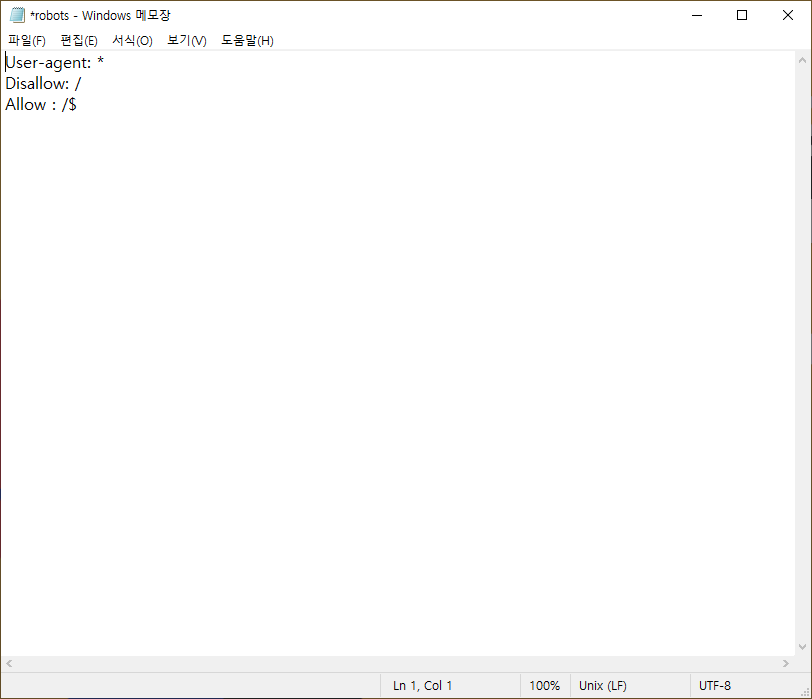

- 미국 ted 페이지 뭐는 허용안되는지 보자 
- ### 크롤링 정책이 있다
- robots.txt가 모든 사이트에 있는 것은 아니다. 개발자가 까먹었다든가...
- 이걸 어기면 무조건 법적 책임이 있는 것은 아니다 >> 크롤링법이 우리나라에 있진 않다. 
- 제한, 권고 정도만 되는 것이고 실제로 크롤링을 내가 해서 법적 책임이 생기는 경우는 과도한 크롤링으로 서비스에 영향을 주었을 경우, 업무 방해 혐의로 고소당할 수 있음

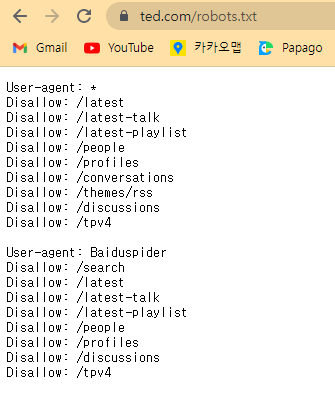

### Naver Rest API
- 파파고 번역 api
- 통합검색어 트렌드 api

In [2]:
import pandas as pd
# 워닝 메시지 따로 없어서 임포트 안함 해줘도되긴한데
import requests, json

#### 0. request token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [3]:
CLIENT_ID, CLIENT_SECRET = "pc_VCjkO7orr9xtiurHR", "CLcWcWvMB8"

#### 1. 파파고 번역 api
- `https://developers.naver.com/docs/papago/`
- 사용법
    - `https://developers.naver.com/docs/papago/papago-nmt-api-reference.md`

- 1. API 문서에서 URL 사용하는 방법 먼저 찾기
- 2. request(URL, key, ko_text) 유알엘과, 키값, 한글 문자열을 가지고 요청해서 > response : json(str) 제이슨을 스트링 타입으로 응답받아옴 xml을 사용하는 경우도 있는데 굉장히 옛날 방식임 아예 없진 않음
- 3. json(str) : en_txt

### (1) API 문서 : URL

In [4]:
ko_txt = '웹 크롤링은 재미있습니다.'
#  1. API 문서 : URL, curl이라고 되어있는것
url = 'https://openapi.naver.com/v1/papago/n2mt'

# 앞에 - H 라고 되어 있는 것은 Header라고 생각하면 됨
headers = {
  'Content-Type' : 'application/json',
  'X-Naver-Client-Id' : CLIENT_ID,
  'X-Naver-Client-Secret' : CLIENT_SECRET,
}

# -d 는 데이터, 데이터 설정해 줘야 함 (쿼리)
params = {'source' : 'ko', 'target' : 'en', 'text': ko_txt}
# ko -> en 한국어 > 영어로 번역

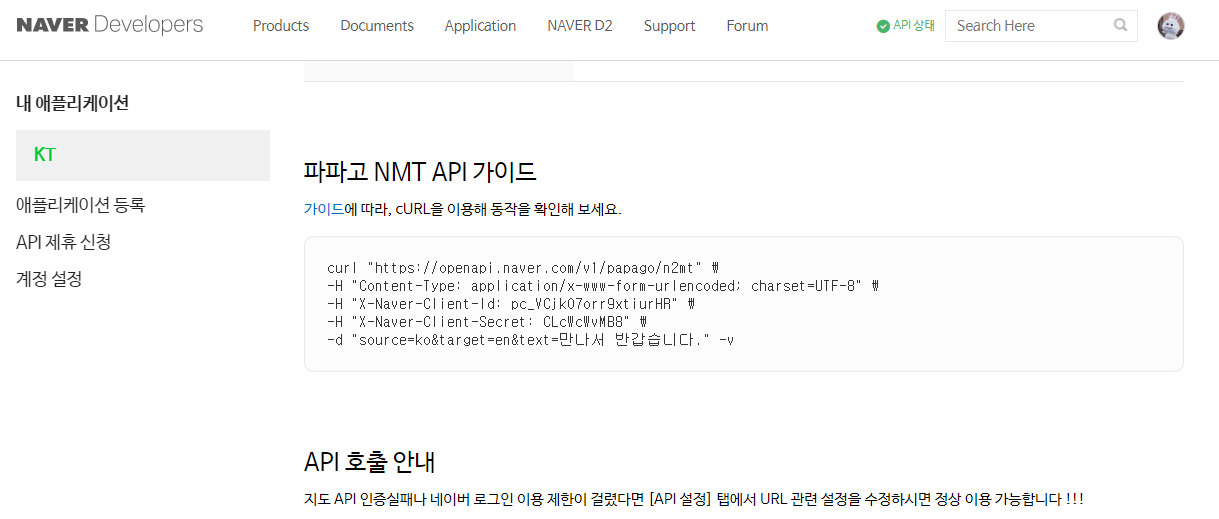

## 파란색 가이드 글자를 누르면?
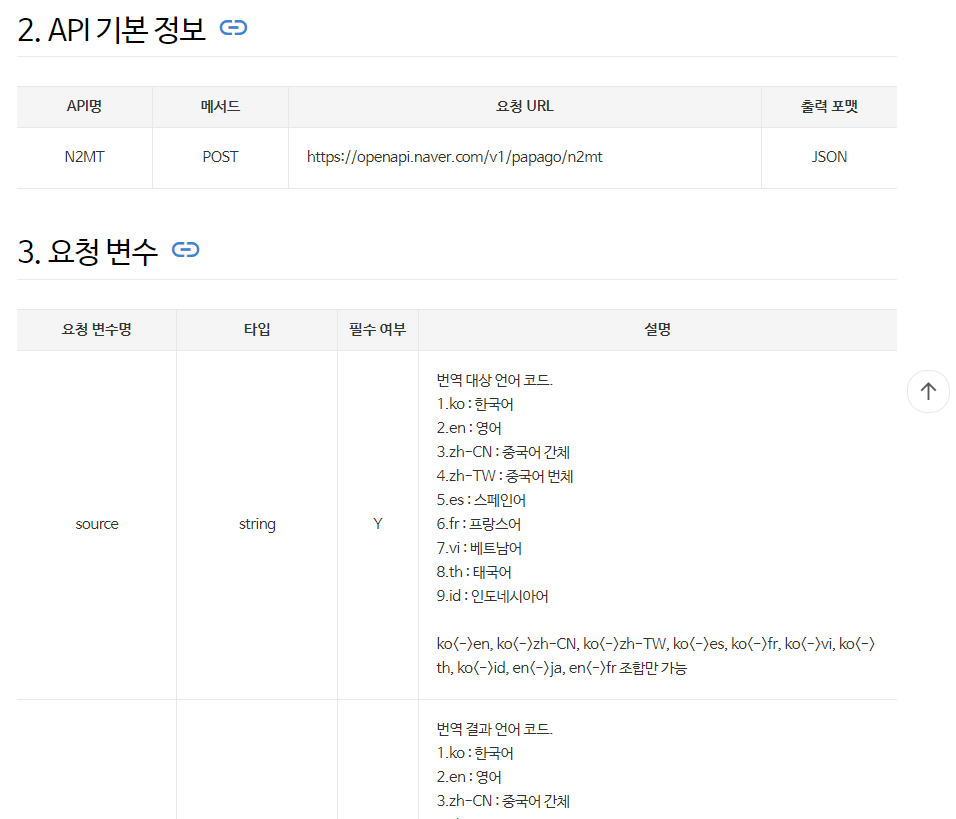
## 필수 여부 Y라고 되어있는 것을 하나라도 빼먹으면 401 에러가 뜰 것임.

### (2) request(URL, key, ko_txt) > response : json(str)

In [8]:
response = requests.post(url, params, headers = headers) # 제이슨 덤프스가 없다면?
response

<Response [400]>

In [9]:
response.text # error Message를 확인하고, 무엇이 잘못되었는지 파악

'{"errorCode":"-10001","errorMessage":"INVALID_REQUEST"}'

In [4]:
json.dumps(params)
# 제이슨 덤프스를 사용하는 이유는? 한국어가 데이터 클라이언트 사이에 주고받을 때는 한국어를 사용할 수 없음. 영문, 특수문자, 숫자를 사용해야 하는데 그래서 한국어를 바꿔서 전송해주고 그것을 해 주는 게 제이슨 덤프스
# 한국어를 쓰지 않으면 제이슨 덤프스 쓸 필요가 없음. 한글은 네트워크에서 사용할 수 없는 문자 체계이기 때문에 인코더를 해서 전송해야 함

'{"source": "ko", "target": "en", "text": "\\uc6f9 \\ud06c\\ub864\\ub9c1\\uc740 \\uc7ac\\ubbf8\\uc788\\uc2b5\\ub2c8\\ub2e4."}'

In [5]:
# 2. request(URL, key, ko_txt) > response : json(str)
response = requests.post(url, json.dumps(params), headers = headers) # post 방식이었으니 post 방식으로 전송
response

<Response [200]>

In [11]:
response.text

'{"message":{"result":{"srcLangType":"ko","tarLangType":"en","translatedText":"Web crawling is fun.","engineType":"N2MT","pivot":null,"dict":null,"tarDict":null,"modelVer":"Unknown"},"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0"}}'

### (3) json(str) : en_txt


In [7]:
# 3. json(str) : en_txt
en_txt = response.json()['message']['result']['translatedText'] # 요청받은 문자열 데이터에서 번역된 결과물을 리턴
en_txt

'Web crawling is fun.'

### (4) 간단하게 함수로 만들어보자

In [14]:
# 4. make function
def translate(txt, source = 'ko', target = 'en'):
  CLIENT_ID, CLIENT_SECRET = "pc_VCjkO7orr9xtiurHR", "CLcWcWvMB8"
  url = 'https://openapi.naver.com/v1/papago/n2mt' 
  headers = { 
    'Content-Type': 'application/json', 
    'X-Naver-Client-Id': CLIENT_ID, 
    'X-Naver-Client-Secret': CLIENT_SECRET, 
    } 
  params = {'source': source, 'target': target, 'text': txt} 
  response = requests.post(url, json.dumps(params), headers=headers) 
  return response.json()['message']['result']['translatedText']

In [15]:
translate('데이터 사이언스는 재미있습니다.')

'Data Science is fun.'

- 한글로 되어있는 엑셀 파일을 영문으로 번역해서 외국 바이어한테 메일로 전송하는 업무가 있음
- 계속 한글로 되어있는 걸 하나하나 자기가 번역해서 입력해야 되는데 
- 이건 번역된 결과를 자기가 검수만 하면 되었음. 이 코드가 엄청 도움이 됨

In [17]:
# 엑셀파일을 이런식으로 데이터프레임으로 불러올 수 있음
df = pd.DataFrame({
  # 'id': range(2),
  'id': list('AB'),
  'title': ['인공지능 스쿨 화이팅', '데이터 크롤링']
})
df

,id,title
0,A,인공지능 스쿨 화이팅
1,B,데이터 크롤링


In [19]:
df['title']

0    인공지능 스쿨 화이팅
1        데이터 크롤링
Name: title, dtype: object

In [20]:
df['title'].apply(translate) # 타이틀에 있는 모든 값이 translate 함수에 들어가서 적용이 됨 그리고 결과를 컬럼에 하나 추가해서 보여주면 됨.

0    AI school, fighting!
1           Crawling data
Name: title, dtype: object

In [21]:
df['en_title'] = df['title'].apply(translate)
df

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


In [30]:
# 이제 저장
df.to_excel('en_title.xlsx', index=False, encoding='utf-8-sig')

In [31]:
%ls # 사용 하는 인코딩 언어와 데이터 인코딩 언어가 달라서 깨져 보임

 G ����̺��� ����: Google Drive
 ���� �Ϸ� ��ȣ: 1983-1116

 g:\�� ����̺�\KT aivleschool\KT_aivle_school_AI_track\06. �� ũ�Ѹ�\day1 ���͸�

2023-02-16  ���� 04:19    <DIR>          .
2023-02-16  ���� 09:45    <DIR>          ..
2023-02-16  ���� 02:51           205,758 01_requests_naver_stock.ipynb
2023-02-16  ���� 03:11            22,485 02_requests_daum_exchange.ipynb
2023-02-16  ���� 04:19           160,191 03_naver_api.ipynb
2023-02-13  ���� 05:31             2,554 04_requests_zigbang.ipynb
2023-02-16  ���� 04:19             5,556 en_title.xlsx
               5�� ����             396,544 ����Ʈ
               2�� ���͸�  10,219,339,776 ����Ʈ ����


In [32]:
pd.read_excel('en_title.xlsx')

,id,title,en_title
0,A,인공지능 스쿨 화이팅,"AI school, fighting!"
1,B,데이터 크롤링,Crawling data


#### 2. 통합검색어 트렌드 api
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

### sns 서비스 별로 검색어 트렌드를 확인해 보자
- datalab.naver.com
> 들어가서 차곡차곡 적기

In [34]:
# 현재 선언된 변수 목록 확인
%whos

Variable        Type         Data/Info
--------------------------------------
CLIENT_ID       str          pc_VCjkO7orr9xtiurHR
CLIENT_SECRET   str          CLcWcWvMB8
df              DataFrame      id        title        <...>크롤링         Crawling data
en_txt          str          Web crawling is fun.
headers         dict         n=3
json            module       <module 'json' from 'c:\\<...>\lib\\json\\__init__.py'>
ko_txt          str          웹 크롤링은 재미있습니다.
params          dict         n=3
pd              module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
requests        module       <module 'requests' from '<...>\\requests\\__init__.py'>
response        Response     <Response [200]>
translate       function     <function translate at 0x0000019295B045E0>
url             str          https://openapi.naver.com/v1/papago/n2mt


In [35]:
# 선언된 변수 초기화
%reset

In [36]:
%whos

Interactive namespace is empty.


In [37]:
CLIENT_ID, CLIENT_SECRET = "pc_VCjkO7orr9xtiurHR", "CLcWcWvMB8"


In [38]:
%whos

Variable        Type    Data/Info
---------------------------------
CLIENT_ID       str     pc_VCjkO7orr9xtiurHR
CLIENT_SECRET   str     CLcWcWvMB8


### (1) API 문서 : URL
  - https://developers.naver.com/docs/serviceapi/datalab/search/search.md#%EB%84%A4%EC%9D%B4%EB%B2%84-%ED%86%B5%ED%95%A9-%EA%B2%80%EC%83%89%EC%96%B4-%ED%8A%B8%EB%A0%8C%EB%93%9C-%EC%A1%B0%ED%9A%8C 공식문서 참조

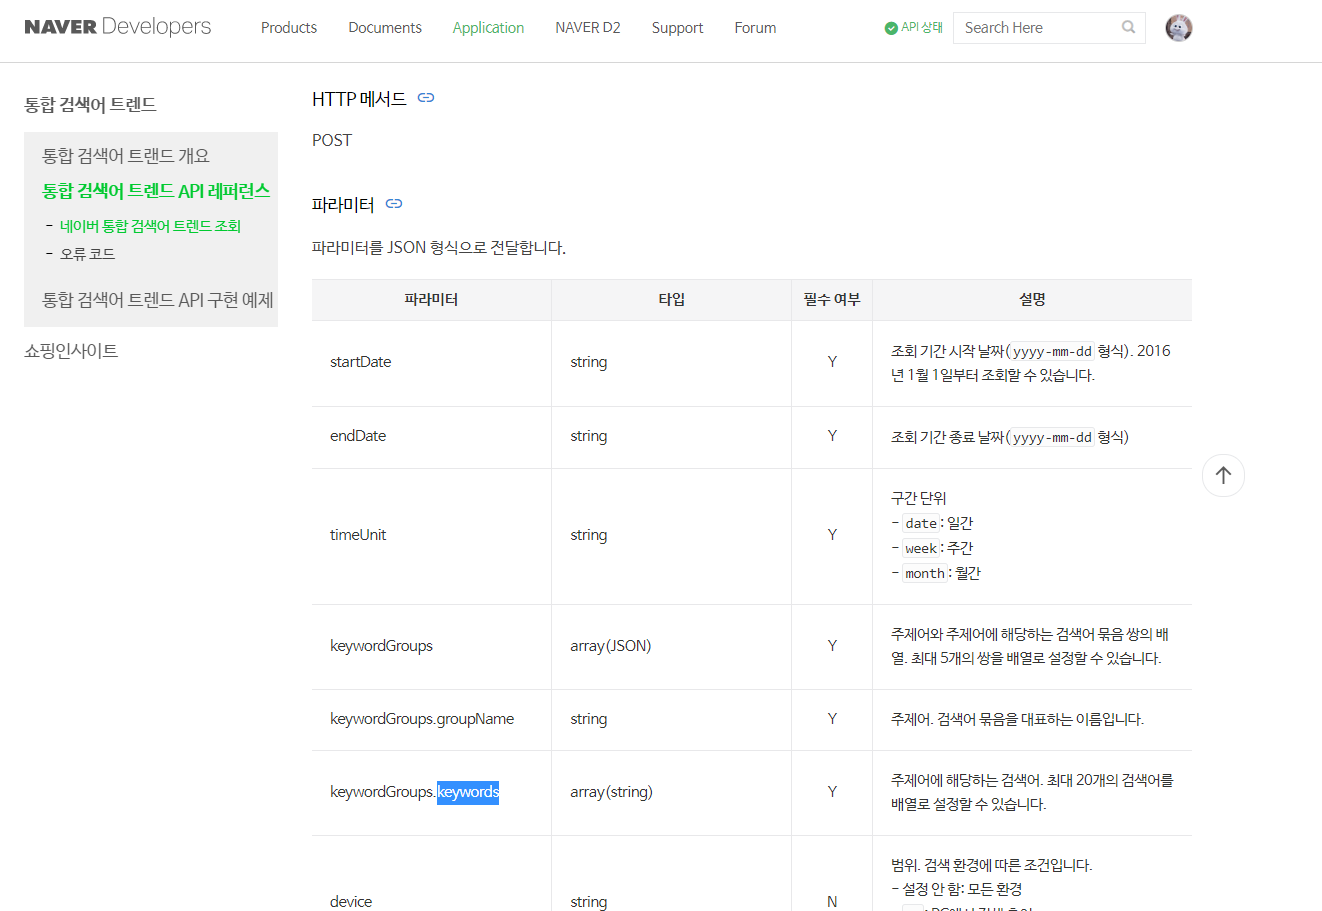

In [39]:
url = 'https://openapi.naver.com/v1/datalab/search'
# post 방식이라 파라미터 추가해줘야함 >> 여기 있는 거 오타나면 에러 발생함
params = {
  'startDate' : '2018-01-01',
  'endDate' : '2023-02-16',
  'timeUnit' : 'month', #월간
  'keywordGroups' : [   # array(jSON) = python에서 list
    {'groupName' : '트위터', 'keywords' : ['트위터', '트윗']},
    {'groupName' : '페이스북', 'keywords' : ['페이스북', '페북']},
    {'groupName' : '인스타그램', 'keywords' : ['인스타그램', '인스타']},
  ], 
}

In [40]:
headers = { 
  'Content-Type': 'application/json', 
  'X-Naver-Client-Id': CLIENT_ID, 
  'X-Naver-Client-Secret': CLIENT_SECRET, 
}

### (2) request(URL) > response : json(str)

In [42]:
response = requests.post(url, json.dumps(params), headers=headers) 
response

<Response [200]>

### (3) json(str) > list, dict > DataFrame

In [43]:
# 가져온 데이터 확인
response.text

'{"startDate":"2018-01-01","endDate":"2023-02-16","timeUnit":"month","results":[{"title":"트위터","keywords":["트위터","트윗"],"data":[{"period":"2018-01-01","ratio":14.59502},{"period":"2018-02-01","ratio":13.0238},{"period":"2018-03-01","ratio":12.97953},{"period":"2018-04-01","ratio":12.82991},{"period":"2018-05-01","ratio":13.05391},{"period":"2018-06-01","ratio":13.34512},{"period":"2018-07-01","ratio":13.02773},{"period":"2018-08-01","ratio":13.45399},{"period":"2018-09-01","ratio":12.83755},{"period":"2018-10-01","ratio":13.05677},{"period":"2018-11-01","ratio":12.77338},{"period":"2018-12-01","ratio":12.86931},{"period":"2019-01-01","ratio":13.31172},{"period":"2019-02-01","ratio":11.74776},{"period":"2019-03-01","ratio":11.82313},{"period":"2019-04-01","ratio":12.32991},{"period":"2019-05-01","ratio":12.43771},{"period":"2019-06-01","ratio":13.29913},{"period":"2019-07-01","ratio":14.00593},{"period":"2019-08-01","ratio":14.208},{"period":"2019-09-01","ratio":14.00856},{"period":"2019

In [44]:
# 위의 것을 df 형태로 파싱
response.json()

{'startDate': '2018-01-01',
 'endDate': '2023-02-16',
 'timeUnit': 'month',
 'results': [{'title': '트위터',
   'keywords': ['트위터', '트윗'],
   'data': [{'period': '2018-01-01', 'ratio': 14.59502},
    {'period': '2018-02-01', 'ratio': 13.0238},
    {'period': '2018-03-01', 'ratio': 12.97953},
    {'period': '2018-04-01', 'ratio': 12.82991},
    {'period': '2018-05-01', 'ratio': 13.05391},
    {'period': '2018-06-01', 'ratio': 13.34512},
    {'period': '2018-07-01', 'ratio': 13.02773},
    {'period': '2018-08-01', 'ratio': 13.45399},
    {'period': '2018-09-01', 'ratio': 12.83755},
    {'period': '2018-10-01', 'ratio': 13.05677},
    {'period': '2018-11-01', 'ratio': 12.77338},
    {'period': '2018-12-01', 'ratio': 12.86931},
    {'period': '2019-01-01', 'ratio': 13.31172},
    {'period': '2019-02-01', 'ratio': 11.74776},
    {'period': '2019-03-01', 'ratio': 11.82313},
    {'period': '2019-04-01', 'ratio': 12.32991},
    {'period': '2019-05-01', 'ratio': 12.43771},
    {'period': '2019-06-

In [46]:
# results만 필요함 results라는 변수에 넣어주기
results = response.json()['results']
type(results)

list

In [48]:
# columns : period, ratio, title 순서의 df로 변경해 주기
# results[0]

dfs = []
for result in results: # 이 포문은 3번 반복됨 0번은 트위터 1번은 페북 2번은 인스타그램
  df = pd.DataFrame(result['data']) # 3번 도니까 3개의 df가 만들어짐
  dfs.append(df)

In [49]:
len(dfs) # 3개의 데이터프레임을 가짐

3

In [50]:
# 트위터 데이터 - 0, 페북 - 1, 인스타 - 2
dfs[0]

,period,ratio
0,2018-01-01,14.59502
1,2018-02-01,13.02380
2,2018-03-01,12.97953
3,2018-04-01,12.82991
4,2018-05-01,13.05391
...,...,...
57,2022-10-01,27.11456
58,2022-11-01,25.41930
59,2022-12-01,25.55513
60,2023-01-01,26.64944


In [51]:
dfs = []
for result in results: # 이 포문은 3번 반복됨 0번은 트위터 1번은 페북 2번은 인스타그램
  df = pd.DataFrame(result['data']) # 3번 도니까 3개의 df가 만들어짐
  # title 데이터가 없으니 만들어주기
  df['title'] = result['title']
  dfs.append(df)

In [52]:
len(dfs)

3

In [53]:
dfs[0]

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
57,2022-10-01,27.11456,트위터
58,2022-11-01,25.41930,트위터
59,2022-12-01,25.55513,트위터
60,2023-01-01,26.64944,트위터


In [55]:
# df 3개를 결합해주기
result_df = pd.concat(dfs, ignore_index=True) # ignore_index는 정렬해줌
result_df 
# 기간, 비율, 제목 형태로 만들어진 df가 완성됨

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
181,2022-10-01,23.38901,인스타그램
182,2022-11-01,21.51581,인스타그램
183,2022-12-01,20.33907,인스타그램
184,2023-01-01,20.30135,인스타그램


### (4) 시각화

In [ ]:
# column : title(twitter, facebook, instargram)
# index : period
# value : ratio

In [56]:
pivot_df = result_df.pivot('period', 'title', 'ratio')
pivot_df

title,인스타그램,트위터,페이스북
period,,,
2018-01-01,23.41982,14.59502,97.80481
2018-02-01,22.53544,13.02380,89.05814
2018-03-01,25.39880,12.97953,98.84292
2018-04-01,26.55983,12.82991,100.00000
2018-05-01,28.60035,13.05391,92.23588
...,...,...,...
2022-10-01,23.38901,27.11456,16.73444
2022-11-01,21.51581,25.41930,15.12064
2022-12-01,20.33907,25.55513,14.72503


#### column 데이터를 영문데이터로 변경

In [57]:
# update : 데이터 선택 = 수정할 데이터 >> 물론 rename 이런거 써도 되는데 이 개념 알고 있으면 df 다루는데 쉬워짐
pivot_df.columns = ['instargram', 'twitter', 'facebook']

In [58]:
pivot_df.tail(2)

,instargram,twitter,facebook
period,,,
2023-01-01,20.30135,26.64944,14.87866
2023-02-01,10.55313,13.56007,7.00545


In [59]:
import matplotlib.pyplot as plt

In [62]:
# 그래프를 선명하게 만들기?
# %는 스페셜 커맨드라고 해요 아이파이썬노트북에서 지원하는 기능임
%config InlineBackend.figure_format = {'png', 'retina'} # retina가 해상도를 선명하게 해 줌

ERROR:root:The 'figure_format' trait of an InlineBackend instance expected a unicode string, not the tuple ('png', 'retina').


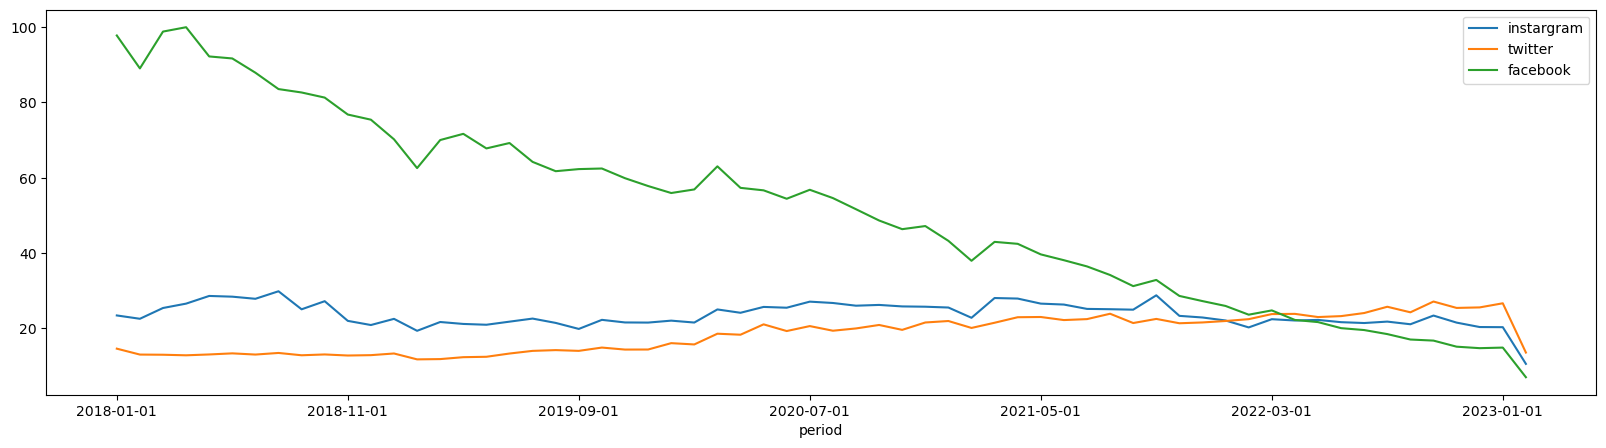

In [63]:
pivot_df.plot(figsize = (20, 5))
plt.show()

## 요약)
- api 키값을 먼저 받고
- 도큐먼트 봐서 사용법 찾고 
- 크롤링은 네트워크 트랙킹에서 url을 찾는 거, api는 도큐먼트에서 url을 찾는 게 차이점임